#Decision Tree

In [ ]:
#Importing all Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [ ]:
#Load dataset
wine_dataset = pd.read_csv('wine_quality.csv')
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine_dataset.quality.value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


In [ ]:
# Create Classification version of target variable
wine_dataset['quality'] = wine_dataset['quality'].map(lambda x: 1 if x >= 6 else 0)
wine_dataset.quality.value_counts().sort_index()

,count
quality,
0,2384
1,4113


### Data splitting

In [ ]:
# Separate feature variables and target variable & removing the type attribute
X = wine_dataset.drop(['quality', 'type'], axis = 1)
y = wine_dataset['quality']
feature_names = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Imputation

In [ ]:
# handling missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### Model training

In [ ]:
# creating  model variable
dt = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=10)

# fit the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
# plot_tree(dt, filled=True, ax=ax)
# plt.show()

### Model Evaluation:

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
DT_df = {'actual':y_test, 'predicted':y_pred}
pd.DataFrame(DT_df).head(10)

,actual,predicted
3772,1,1
6009,1,1
3464,0,0
1518,1,1
3761,1,1
1070,1,1
2809,1,1
3516,1,1
3817,1,1
5754,1,1


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.7615384615384615
Precision: 0.7953488372093023
Recall: 0.8361858190709046
F1: 0.8152562574493445


Text(0.5, 1.0, 'Confusion Matrix')

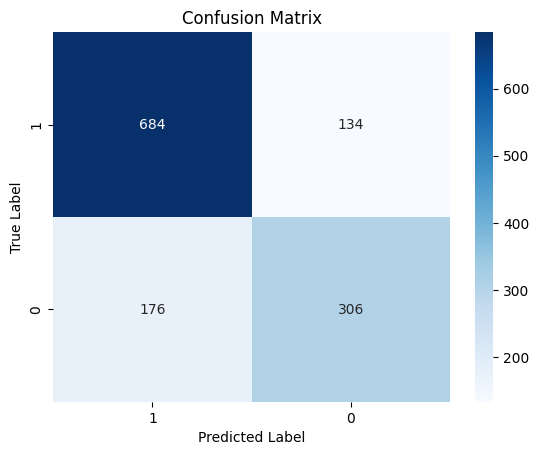

In [ ]:
# plot confusion matrix
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

### Report ROC-AUC score

ROC-AUC Score: 0.8039824894236524


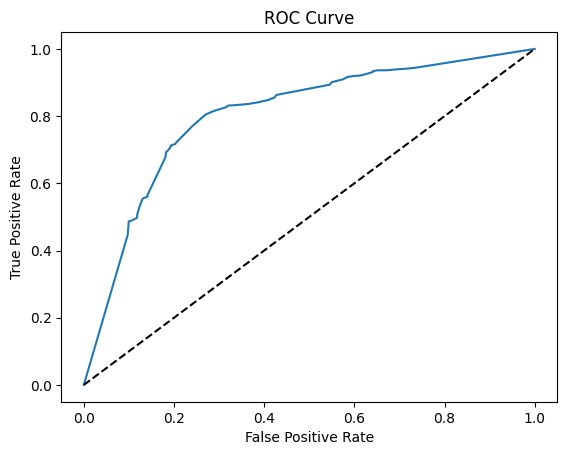

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = dt.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Exercise 2: Use random forest



In [ ]:
# 1. import RandomForestClassifier from sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# 2. create an object of random forest classifier (random_state = 1)
# forest = ...
forest = RandomForestClassifier(random_state=1)

# 3. fit the random forest classifer on training data, i.e., X_train and y_train
forest.fit(X_train, y_train)

# 4. make predictions on the test dataset, i.e., X_test, using the trained classifer
# y_pred = ...
y_pred = forest.predict(X_test)

# 5. calculate and print the accuracy, precision, recall, and f1-score for the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8361538461538461
Precision: 0.852975495915986
Recall: 0.8936430317848411
F1: 0.8728358208955224
